Pre-Requisites for RL implementation Compatibility

In [ ]:
!pip install gym

In [ ]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender
#Video Game play Prerequisites

In [ ]:
!pip install imageio==2.4.1
#Video Game play Prerequisites

In [ ]:
!pip install gym[toy_text]
#Video Game play Prerequisites

In [ ]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
#Video Game play Prerequisites

In [ ]:
from colabgymrender.recorder import Recorder

#TD Prediction Implementation

Loading Environment

In [ ]:
import gym
import pandas as pd

In [ ]:
env = gym.make('FrozenLake-v1')

In [ ]:
states = env.observation_space
states

Discrete(16)

In [ ]:
actions = env.action_space
actions

Discrete(4)

Define the random policy, which returns the random action by
sampling from the action space:


In [ ]:
def random_policy():
  return env.action_space.sample()

Let's define the dictionary for storing the value of states, and we
initialize the value of all the states to 0.0

In [ ]:
V = {}
for s in range(env.observation_space.n): 
  V[s]=0.0

In [ ]:
V

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0}

Initialize the discount factor and the learning rate :

In [ ]:
alpha = 0.85
gamma = 0.90

Set the number of episodes and the number of time steps in each
episode:

In [ ]:
num_episodes = 50000
num_timesteps = 1000

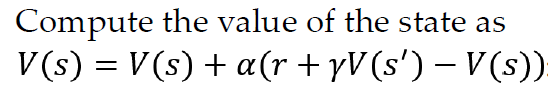

In [ ]:
#For each episode:
for i in range(num_episodes):

  s = env.reset() #Initialize the state by rese􀄴ing the environment

  #For every step in the episode
  for t in range(num_timesteps):

    #Select an action according to random policy
    a = random_policy()

    #Perform the selected action and store the next state information
    s_, r, done, _ = env.step(a)

    #Compute the value of the state as
    V[s] += alpha * (r + gamma * V[s_]-V[s])

    #Update the next state to the current state
    s = s_

    #If the current state is the terminal state, then break
    if done:
      break



In [ ]:
V

{0: 0.00975182164000027,
 1: 0.00018584972405691737,
 2: 0.001238976022755118,
 3: 8.682992048224279e-06,
 4: 0.016949291007967285,
 5: 0.0,
 6: 1.6537823483282067e-06,
 7: 0.0,
 8: 0.09761849116027924,
 9: 0.4497562519538948,
 10: 0.0034042339658670283,
 11: 0.0,
 12: 0.0,
 13: 0.07316840505605643,
 14: 0.16700677938456976,
 15: 0.0}

Evaluating the values of the states

let's evaluate our value function (state values). First, let's
convert our value dictionary to a pandas data frame for more clarity

In [ ]:
df = pd.DataFrame(list(V.items()), columns=['state', 'value'])

In [ ]:
df

,state,value
0,0,0.009752
1,1,0.000186
2,2,0.001239
3,3,0.000009
4,4,0.016949
5,5,0.000000
6,6,0.000002
7,7,0.000000
8,8,0.097618
9,9,0.449756


As we can observe, we now have the values of all the states. The
value of state 14 is high since we can reach goal state 15 from state 14
easily, and also, as we can see, the values of all the terminal states
(hole states and the goal state) are zero.

Note that since we have initialized a random policy, you might get
varying results every time you run the previous code.

#On-policy TD control – SARSA Implementation

In [ ]:
import random

In [ ]:
env = gym.make('FrozenLake-v1')

Let's define the dictionary for storing the Q value of the state-action
pair and initialize the Q value of all the state-action pairs to 0.0

In [ ]:
Q = {}
for s in range(env.observation_space.n):
  for a in range(env.action_space.n):
    Q[(s,a)] = 0.0

let's define the epsilon-greedy policy. We generate a random
number from the uniform distribution and if the random number is
less than epsilon, we select the random action, else we select the best
action that has the maximum Q value

In [ ]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])

Initialize the discount factor and the learning rate and epsilon value.Define the number of episodes and number of time steps in the episode

In [ ]:
alpha = 0.85
gamma = 0.90
epsilon = 0.8
num_episodes = 20000
num_timesteps = 1000

Compute the optimal policy using the SARSA update rule as:

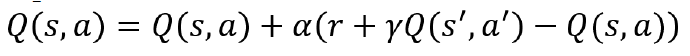

In [ ]:
#for each episode
for i in range(20000):
       
    #initialize the state by resetting the environment
    s = env.reset()
    
    #select the action using the epsilon-greedy policy
    a = epsilon_greedy(s,epsilon)
    
    #for each step in the episode:
    for t in range(num_timesteps):

        #perform the selected action and store the next state information: 
        s_, r, done, _ = env.step(a)
        
        #select the action a dash in the next state using the epsilon greedy policy:
        a_ = epsilon_greedy(s_,epsilon) 
        
        #compute the Q value of the state-action pair
        Q[(s,a)] += alpha * (r + gamma * Q[(s_,a_)]-Q[(s,a)])
        
        #update next state to current state
        s = s_
        
        #update next action to current action
        a = a_


        #if the current state is the terminal state then break:
        if done:
            break

In [ ]:
Q

{(0, 0): 0.0002843758361333258,
 (0, 1): 0.00034957843781881676,
 (0, 2): 7.203072618480004e-05,
 (0, 3): 1.821033079231176e-05,
 (1, 0): 8.510958034961833e-06,
 (1, 1): 6.06178940933605e-05,
 (1, 2): 6.529225526291806e-06,
 (1, 3): 1.6895728999935145e-05,
 (2, 0): 4.887252895667819e-05,
 (2, 1): 4.951612201860071e-05,
 (2, 2): 0.44883098024541546,
 (2, 3): 0.00010951194055357192,
 (3, 0): 8.485166756584904e-05,
 (3, 1): 4.557269064922036e-06,
 (3, 2): 2.982856346413014e-06,
 (3, 3): 2.8790032945732907e-05,
 (4, 0): 0.00019097405342257933,
 (4, 1): 6.267968439342858e-05,
 (4, 2): 3.501182780974642e-05,
 (4, 3): 1.0531300311830001e-05,
 (5, 0): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (6, 0): 0.08800559743951519,
 (6, 1): 1.4605622092892734e-05,
 (6, 2): 7.03295899233641e-05,
 (6, 3): 1.1728884772270065e-05,
 (7, 0): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0,
 (8, 0): 0.00010090405384043197,
 (8, 1): 0.0010409981099325002,
 (8, 2): 0.0005942704442436727,
 (8, 3): 0.0008602865

In [ ]:
len(Q)

64

Note that on every iteration we update the Q function. After all the
iterations, we will have the optimal Q function. Once we have the
optimal Q function then we can extract the optimal policy by
selecting the action that has the maximum Q value in each state.